In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D


In [9]:
# --------- Generate 5D multiple linear regression data (X has 5 features) ---------
np.random.seed(7)
n = 200
X = np.random.uniform(0, 10, size=(n, 5))
true_intercept = 4.0
true_coefs = np.array([2.2, -1.4, 0.8, 3.1, -0.5])
noise = np.random.normal(0, 2.0, size=n)


y = true_intercept + X @ true_coefs + noise

In [10]:
# --------- Fit model ---------
model = LinearRegression().fit(X, y)
pred = model.predict(X)


coef_table = pd.DataFrame({
"feature": [f"X{i+1}" for i in range(5)],
"coef (true)": true_coefs,
"coef (fitted)": model.coef_
})
coef_table.loc[len(coef_table)] = ["intercept", true_intercept, model.intercept_]
print(coef_table.round(3))

     feature  coef (true)  coef (fitted)
0         X1          2.2          2.179
1         X2         -1.4         -1.334
2         X3          0.8          0.723
3         X4          3.1          3.090
4         X5         -0.5         -0.486
5  intercept          4.0          4.197


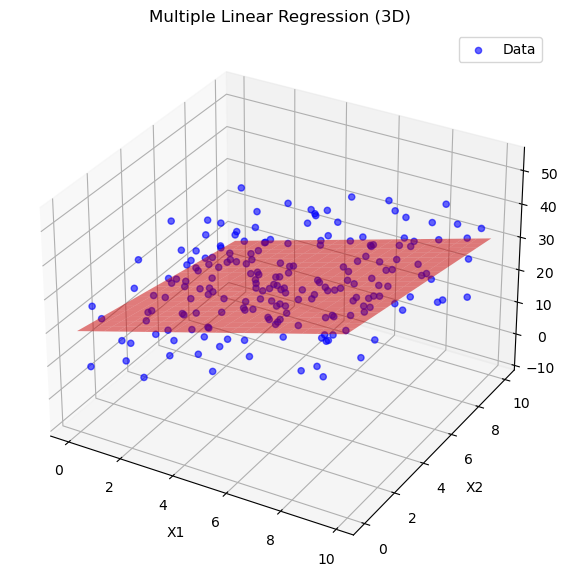

In [11]:
# -------- 0: Classic Multiple Linear Regression in 3D (with 2 features) ------
"""
- Purpose: Show regression plane in 3D with two predictors and target.
- Why use it: Easiest visual to explain the idea of fitting a plane to data.
- When to use: Introductory demos of multiple regression.
- X-axis: Feature X1.
- Y-axis: Feature X2.
- Z-axis: Target y.
- Intuition: Plane represents predictions; scatter shows actual data.
"""

X2d = X[:, :2] # Take first two features for visualization
model2d = LinearRegression().fit(X2d, y)


# Create meshgrid for plane
x1_range = np.linspace(X2d[:, 0].min(), X2d[:, 0].max(), 20)
x2_range = np.linspace(X2d[:, 1].min(), X2d[:, 1].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_mesh = model2d.intercept_ + model2d.coef_[0] * x1_mesh + model2d.coef_[1] * x2_mesh


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2d[:, 0], X2d[:, 1], y, color='blue', alpha=0.6, label="Data")
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color='red', alpha=0.5)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title("Multiple Linear Regression (3D)")
plt.legend()
plt.show()

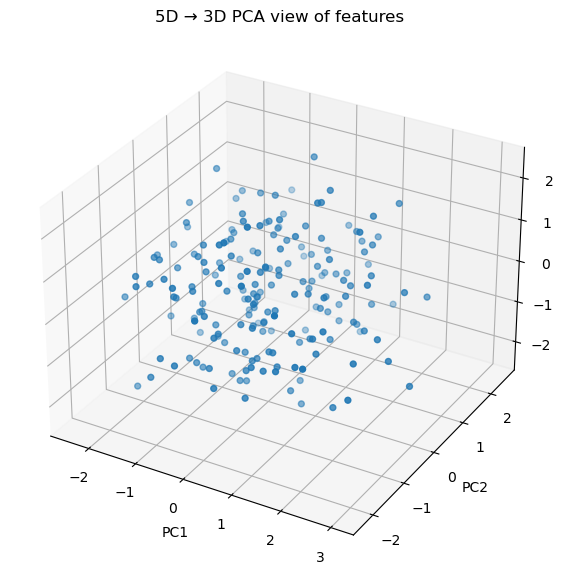

In [12]:
# -------------1: 3D PCA projection of 5D features-----------
"""
- Purpose: Reduce 5D features into 3D to visualize structure.
- Why use it: Humans can’t see 5D; PCA gives a sense of variance directions.
- When to use: For high-dimensional regression/classification to check clusters.
- X-axis: PC1, Y-axis: PC2, Z-axis: PC3.
- Intuition: Points spread out in PCA space → variation across features.
"""

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=18)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("5D → 3D PCA view of features")
plt.show()

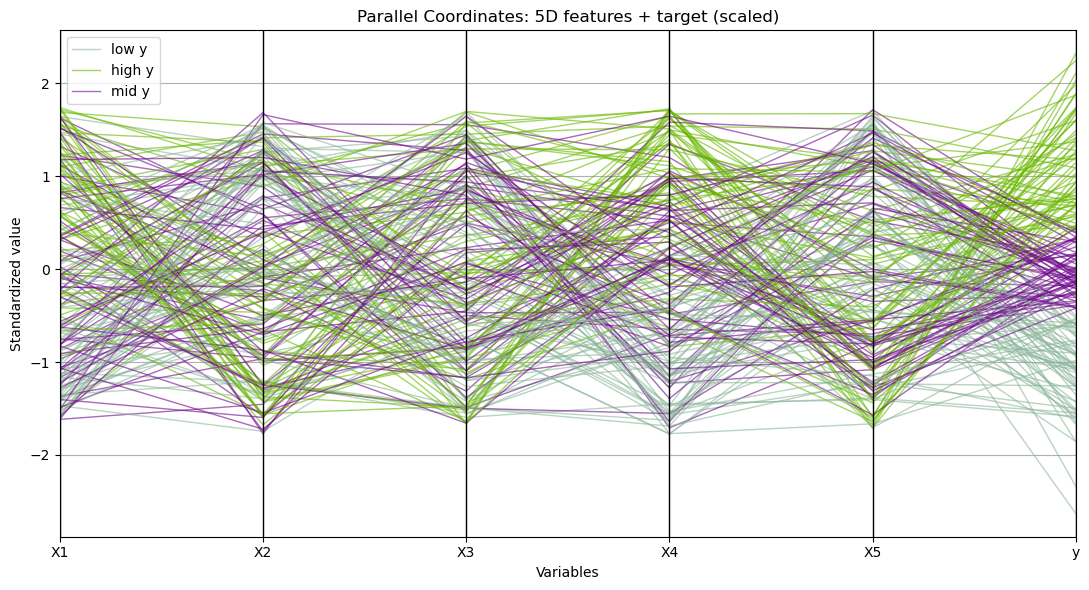

In [13]:
# ----------- 2: Parallel Coordinates ------------
"""
- Purpose: Show each observation as a line across all variables.
- Why use it: Useful to compare relative feature magnitudes.
- When to use: For explainability demos with many features.
- X-axis: Variables (X1…X5, y).
- Y-axis: Standardized value.
- Intuition: Bundled lines indicate correlations; separation shows feature effect.
"""

df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(5)])
df["y"] = y
scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)


# Bin y into 3 groups for line coloring
y_bins = pd.qcut(df["y"], q=3, labels=["low y", "mid y", "high y"])
scaled["class"] = y_bins.astype(str)


plt.figure(figsize=(11, 6))
parallel_coordinates(scaled[["class"] + list(df.columns)], "class", linewidth=1.0, alpha=0.6)
plt.title("Parallel Coordinates: 5D features + target (scaled)")
plt.xlabel("Variables")
plt.ylabel("Standardized value")
plt.legend()
plt.tight_layout()
plt.show()

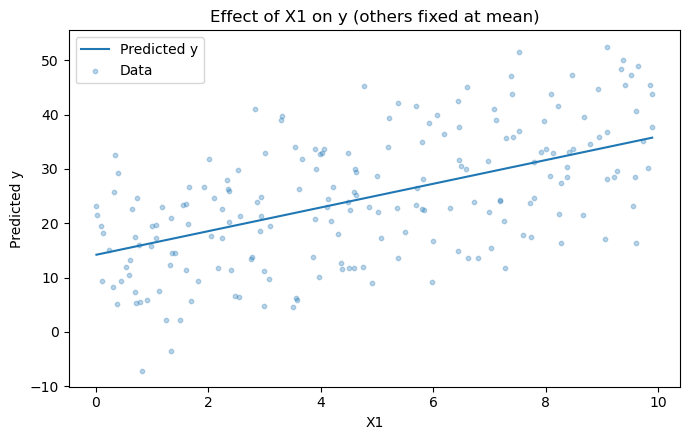

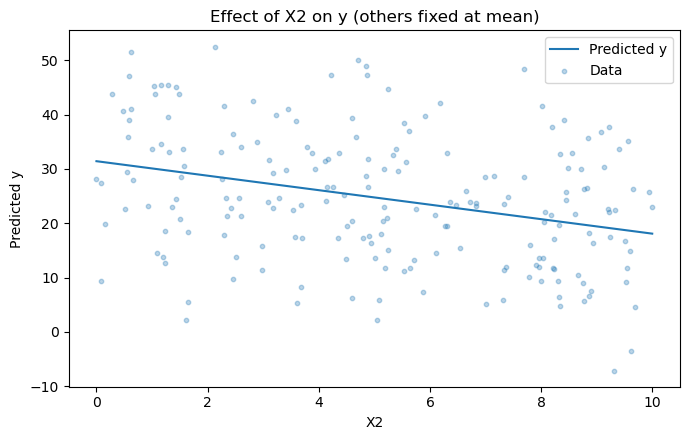

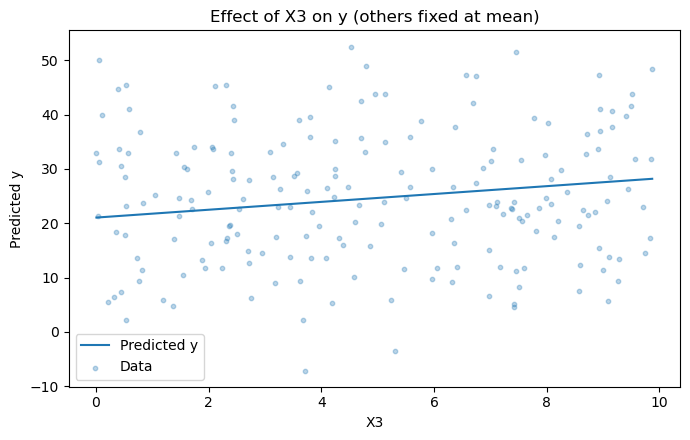

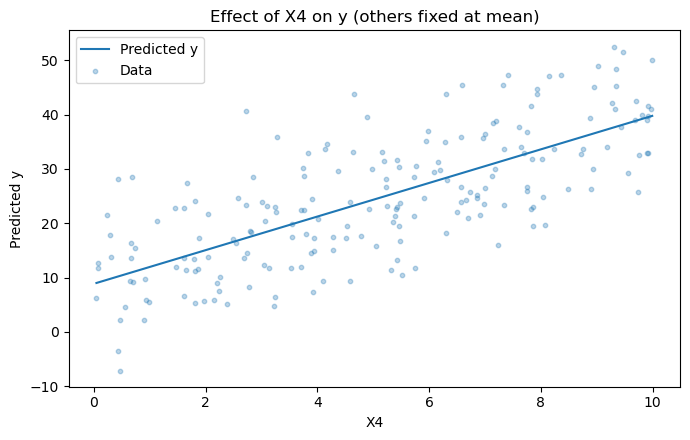

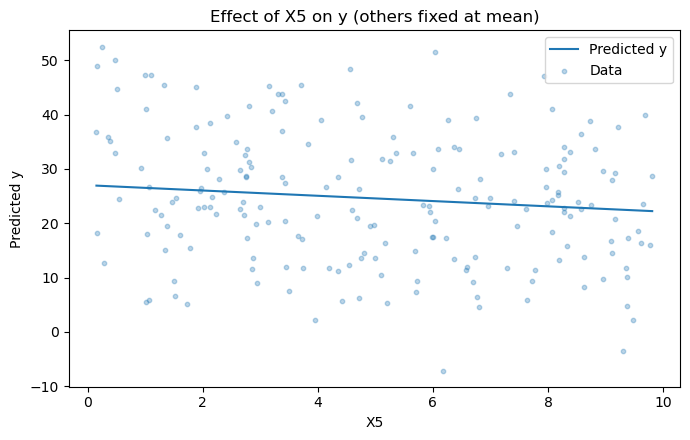

In [14]:
# ------ 3–7: Partial dependence style plots for each feature ----
"""
- Purpose: Show predicted outcome as a smooth function of one feature.
- Why use it: Easiest way to grasp monotonic effect and threshold crossing.
- When to use: When explaining model effect of one feature at a time.
- X-axis: Feature Xi.
- Y-axis: Predicted y.
- Intuition: Steeper slope = stronger influence; crossing certain values = decision points.
"""

X_means = X.mean(axis=0)


for i in range(5):
    xi_vals = np.linspace(X[:, i].min(), X[:, i].max(), 200)
    X_grid = np.tile(X_means, (200, 1))
    X_grid[:, i] = xi_vals
    y_grid = model.predict(X_grid)
    plt.figure(figsize=(7, 4.5))
    plt.plot(xi_vals, y_grid, label="Predicted y")
    plt.scatter(X[:, i], y, s=10, alpha=0.3, label="Data")
    plt.title(f"Effect of X{i+1} on y (others fixed at mean)")
    plt.xlabel(f"X{i+1}")
    plt.ylabel("Predicted y")
    plt.legend()
    plt.tight_layout()
    plt.show()